# The response distribution

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats

<b> Problem 4.4 <b> 

In Problem 3.2, we plotted a posterior distribution along with a likelihood function.
Repeat parts (a) to (f) of that problem, but instead of using a single value of the measurement xobs,
start with a fixed value of the stimulus, namely s = 10. From this value of s, draw five values of
xobs from the measurement distribution. You should observe that, from trial to trial, the likelihood
function and posterior probability density function both “jump around”, similar to Fig. 4.1.

In [41]:
#stimulus

step = 0.2
S = np.arange(0,40 + step, step)
mean_S = 10
Sd_S = 4
prior = stats.norm.pdf(S, mean_S, Sd_S)

#measurement
s_true = 10
std_x_given_s = 5
x_obs_values = np.random.normal(s_true, std_x_given_s, 5)

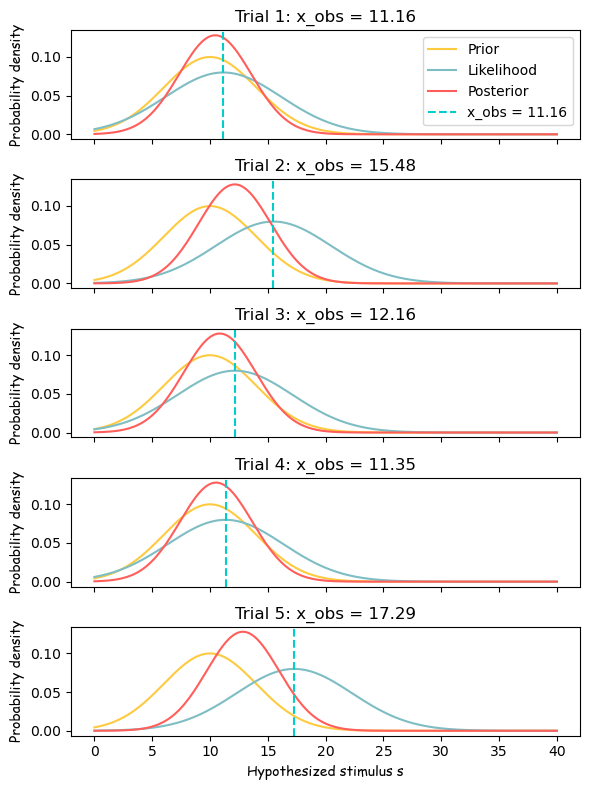

In [48]:
fig, axes = plt.subplots(5, 1, figsize=(6, 8), sharex=True)

for i, x_obs in enumerate(x_obs_values):
    # Step 5: Compute the likelihood for each x_obs
    likelihood = stats.norm.pdf(S, x_obs, std_x_given_s)
    
    # Step 6: Compute the unnormalized posterior
    unnormalized_posterior = likelihood * prior
    
    # Step 7: Normalize the posterior
    posterior = unnormalized_posterior / np.sum(unnormalized_posterior * 0.2)
    plt.style.use('seaborn-v0_8-pastel')
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
    # Step 8: Plot prior, likelihood, and posterior
    axes[i].plot(S, prior, label='Prior', color=color_custom[1])
    axes[i].plot(S, likelihood, label='Likelihood', color=color_custom[2])
    axes[i].plot(S, posterior, label='Posterior', color=color_custom[0])
    axes[i].axvline(x_obs, color=color_custom[3], linestyle='--', label=f'x_obs = {x_obs:.2f}')
    axes[i].set_title(f'Trial {i+1}: x_obs = {x_obs:.2f}')
    axes[4].set_xlabel('Hypothesized stimulus s',**csfont)
    axes[i].set_ylabel('Probability density',**csfont)
    axes[0].legend()

plt.tight_layout()
plt.show()

<b> Problem 4.6 <b>

An observer infers a stimulus s from a measurement xobs. As in the chapter, the
measurement distribution p(x|s) is Gaussian with mean s and variance σ2. Unlike in the chapter,
we use the prior
p(s) = e−λs, (4.17)
where λ is a positive constant. This is an improper prior (see Section 3.5.2) but that does not stop
us.
a) Derive an equation for the posterior mean estimate.
b) Derive an equation for the distribution of the posterior mean estimate for given s.

In [107]:
#measurement
step = 0.2
S = np.arange(0,40 + step, step)
xobs = 20
sd = 5
likelihood = stats.norm.pdf(S, xobs, sd)
l = 0.1
prior = np.exp(-l * S)

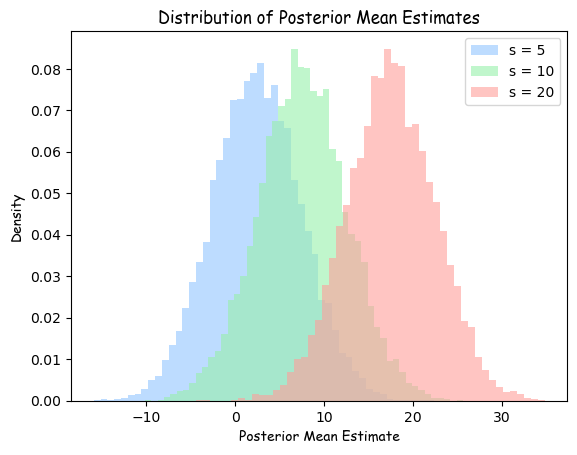

In [108]:
s_values = np.array([5, 10, 20])  
num_samples = 10000  

posterior_means = {}
plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
for s in s_values:
    # Draw samples from the measurement distribution N(s, sd^2)
    xobs_samples = np.random.normal(s, sd, num_samples)
    # Calculate posterior mean estimates for each sample
    # we have a shift (reade section 3.5.2)
    posterior_mean_samples = xobs_samples - (l * sd**2)
    posterior_means[s] = posterior_mean_samples

    plt.hist(posterior_mean_samples, bins=50, density=True, alpha=0.6, label=f's = {s}')

# Plot settings
plt.xlabel('Posterior Mean Estimate',**csfont)
plt.ylabel('Density',**csfont)
plt.title('Distribution of Posterior Mean Estimates',**csfont)
plt.legend()
plt.show()

<b> Problem 4.7 <b>

We define relative bias as the ratio between bias and the difference between the mean
of the stimulus distribution and the true stimulus.

    a) For the posterior mean estimate, derive an expression for relative bias as a function of the ratio R ≡ σ/σs.
    b) Plot relative bias as a function of R.
    c) Does this plot show what you would expect from the Bayesian observer? Explain intuitively.

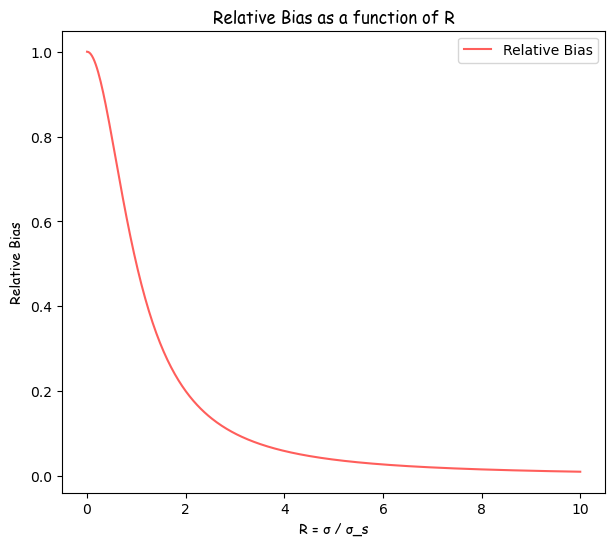

In [11]:

def relative_bias(R):
    return 1 / (1 + R**2)

R_values = np.linspace(0, 10, 400)
relative_bias_values = relative_bias(R_values)

plt.style.use('seaborn-v0_8-pastel')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
plt.figure(figsize=(7, 6))
plt.plot(R_values, relative_bias_values, label='Relative Bias', color = color_custom[0])
plt.xlabel('R = σ / σ_s',**csfont)
plt.ylabel('Relative Bias',**csfont)
plt.title('Relative Bias as a function of R',**csfont)
plt.grid(False)
plt.legend()
plt.show()

<b> Explanation <b>
    
The plot should show that as the ratio R (which represents the relative uncertainty of the stimulus distribution to the noise) increases, the relative bias decreases. Intuitively, this means that as the noise in the observation becomes much larger compared to the uncertainty in the stimulus distribution (i.e., when R is large), the bias of the Bayesian observer's estimate decreases, approaching zero. This aligns with the Bayesian principle where the posterior estimate relies more heavily on the prior when the likelihood (noise) is less informative.
    
    ------------------------------------------------------------------------------------------------------------------
    
 lets have a example in real life..
    if the variance or uncertainity about a given stimulus goes up, we couldnt be sure about our inference. Thats why, our bias
    goes down.

<b> Problem 4.10 <b>

In this problem, we will numerically compare the properties of the MAP and MLE
estimators. Refer to Section 4.5 and the parameter settings in Fig. 4.3.
    
    a) Reproduce Fig. 4.3A using 1000 trials.
    b) Reproduce the MLE and PME curves in Fig. 4.3B by plotting the corresponding mathematical expressions.
    c) For each of the three noise levels, simulate s on 10,000 trials. For each s, compute the squared bias and the variance of
    the PME using the expressions from (b). Add the two quantities tovobtain the stimulus-conditioned MSE. Average across all
    values of s that you drew to obtain the overall MSE of the posterior mean estimate. The resulting values should be close to
    the PME-related numbers (12.8, 32.0, 51.2) in Fig. 4.3B.

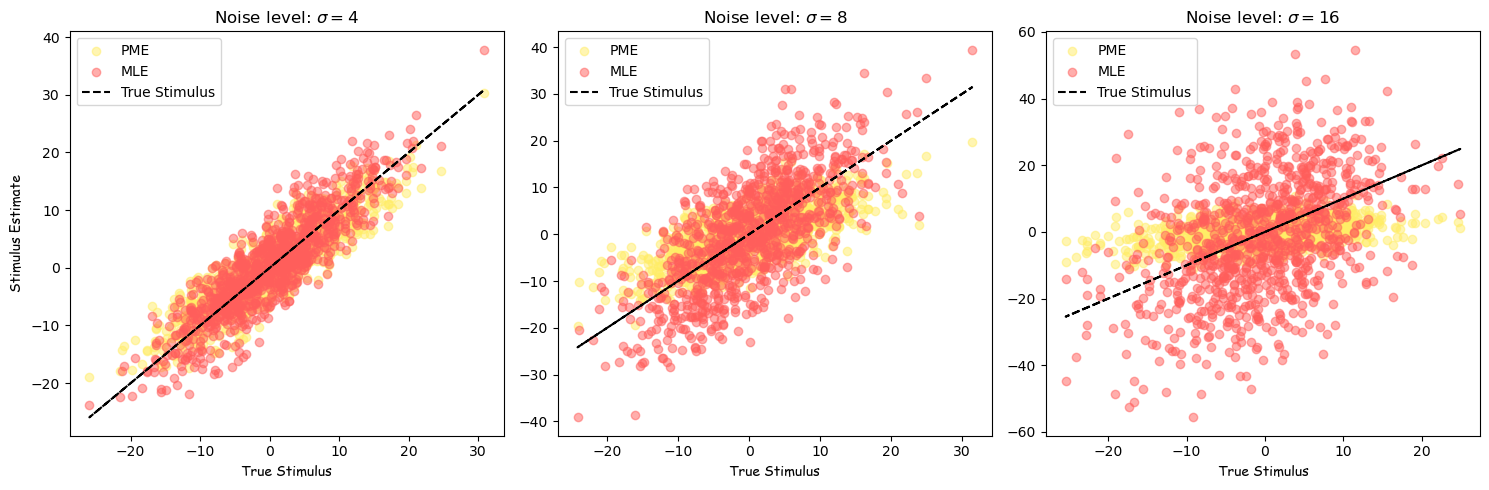

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mu = 0
sigma_s = 8
noise_levels = [4, 8, 16]
num_trials = 1000

# Set random seed for reproducibility
np.random.seed(42)

# Plot settings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sigma in enumerate(noise_levels):
    # Generate stimulus values
    s = np.random.normal(mu, sigma_s, num_trials)
    
    # Generate noisy measurements
    noisy_measurements = s + np.random.normal(0, sigma, num_trials)
    
    # MLE: MLE is equal to the measurement distribution
    mle_estimate = noisy_measurements
    
    # PME: posterior mean estimate
    precision = 1/sigma**2 #like friston notion i guess
    precision_s = 1/sigma_s**2
    pme = (precision*noisy_measurements + precision_s*mu)/(precision + precision_s)
   
    
    plt.style.use('seaborn-v0_8-pastel')
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
    # Scatter plot
    axes[i].scatter(s, pme, color=color_custom[4], alpha=0.5, label='PME')
    axes[i].scatter(s, mle_estimate, color=color_custom[0], alpha=0.5, label='MLE')
    axes[i].plot(s, s, 'k--', label='True Stimulus')
    #axes[i].plot(mle_estimate, mle_estimate, 'k--', label='MLE', color = color_custom[0])
    #axes[i].plot(pme, pme, 'k--', label='PME', color = 'black')
    axes[i].set_title(f'Noise level: $\\sigma = {sigma}$')
    axes[i].set_xlabel('True Stimulus',**csfont)
    axes[0].set_ylabel('Stimulus Estimate',**csfont)
    axes[i].legend()

plt.tight_layout()
plt.show()


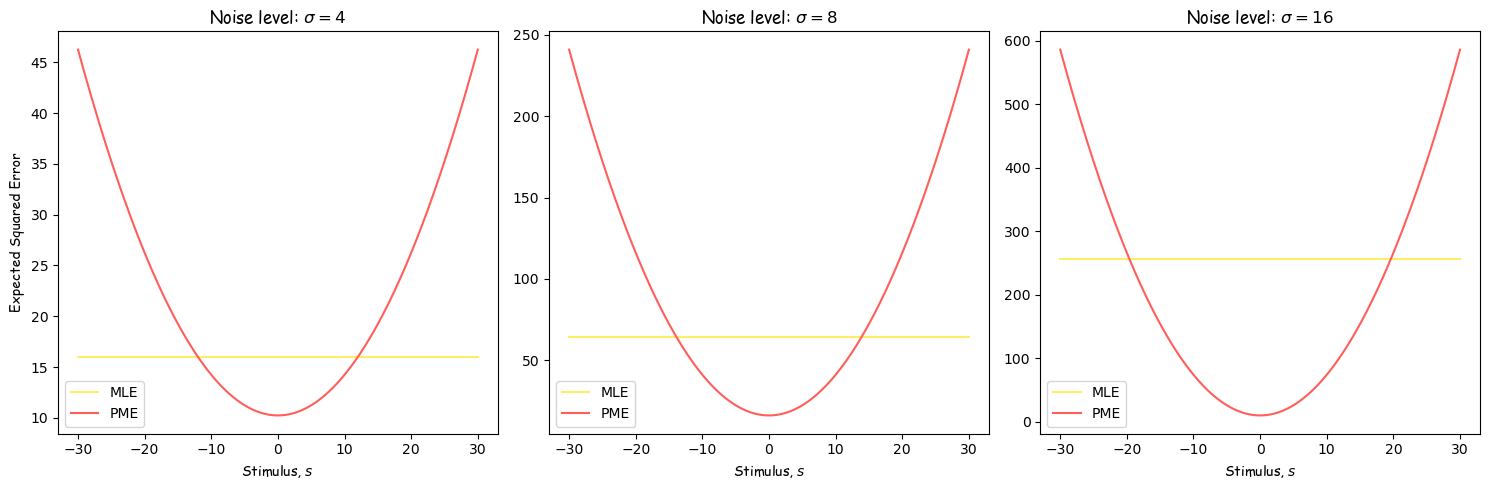

In [99]:
#Part b

# Define parameters
mu = 0
sigma_s = 8
noise_levels = [4, 8, 16]

# Define functions to calculate MSE
def mse_mle(s, sigma):
    return sigma**2
    

def mse_pme(s, sigma, sigma_s):
    precision = 1/sigma**2 #like friston notion i guess
    precision_s = 1/sigma_s**2
    return ((precision_s**2/(precision + precision_s)**2)* (s - mu)**2) + (precision/(precision + precision_s)**2)

# Generate stimulus values
s_values = np.linspace(-30, 30, 1000)

# Plot settings
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sigma in enumerate(noise_levels):
    # Calculate MSE for MLE and PME
    mse_mle_values = mse_mle(s_values, sigma)
    mse_pme_values = mse_pme(s_values, sigma, sigma_s)
    
    plt.style.use('seaborn-v0_8-dark-palette')
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    color_custom = ['#FF5E5B', '#FDCA40', '#7EBDC3', '#00CECB', '#FFED66']
    # Plot MSE curves
    axes[i].plot(s_values, mse_mle_values * np.ones_like(s_values), label='MLE', color=color_custom[4])
    axes[i].plot(s_values, mse_pme_values, label='PME', color=color_custom[0])
    axes[i].set_title(f'Noise level: $\\sigma = {sigma}$',**csfont)
    axes[i].set_xlabel('Stimulus, $s$',**csfont)
    axes[0].set_ylabel('Expected Squared Error',**csfont)
    axes[i].legend()

plt.tight_layout()
plt.show()


In [106]:
#Part C

num_trials = 10000
overall_mse_pme = []

for sigma in noise_levels:
    # Generate stimulus values
    s = np.random.normal(mu, sigma_s, num_trials)
    
    # Compute PME estimates
    precision = 1/sigma**2 #like friston notion i guess
    precision_s = 1/sigma_s**2
    pme_estimate = (precision*noisy_measurements + precision_s*mu)/(precision + precision_s)
    
    
    # Compute stimulus-conditioned MSE
    precision = 1/sigma**2 
    precision_s = 1/sigma_s**2
    mse_pme = ((precision_s**2/(precision + precision_s)**2)* (s - mu)**2) + (precision/(precision + precision_s)**2)
    
    
    # Compute overall MSE by averaging across all trials
    overall_mse_pme.append(np.mean(mse_pme))

# Print the results
print("Overall MSE of PME for each noise level:")
for i, sigma in enumerate(noise_levels):
    print(f"Noise level {sigma}: {overall_mse_pme[i]}")

Overall MSE of PME for each noise level:
Noise level 4: 12.849214882790353
Noise level 8: 31.806172185756477
Noise level 16: 50.5130063294288
